In [ ]:
딥러닝 목표
모델에 입력값을 넣었을 때의 출력값이 최대한 정답과 일치하게 하는 것
딥러닝 모델의 매개변수(weight, bias)를 무작위로 부여한 후, 반복학습을 통해 모델의 출력값을 정답과 일치하도록 매개변수를 조금씩 조정함
- Gradient Descent 최적화 알고리즘

인공신경망 - 뉴럴 네트워크
Perceptron 
사람 두뇌에 있는 뉴런을 모델링한 것 - 간단한 함수를 학습할 수 있음
DNN(Deep Neural Network)
입력층과 출력층 사이에 여러 개의 은닉층(hidden layer)으로 이루어진 인공신경망
신경망 출력에 비선형 활성화 함수를 추가하여 복잡한 비선형 관계를 모델링할 수 있음
hidden layer, unit을 몇 개 할지는 마음대로 구성

input(x값) -> weight -> weight sum -> activation function -> out(y값)

[activation function]
binary step
logistic, sigmoid, soft step 중요
hyperbolic tangent (tanh)
rectified linear unit (ReLU) 중요

[loss function = cost function]
신경망 학습의 목적함수로 출력값(예측값)과 정답(실제값)의 차이를 계산
- regression회귀과 classification분류에서 쓰는 것이 다름
회귀 - MSE(제곱), MAE(절댓값)
분류 - 이진분류에서는 Binary cross-entropy, 다중분류에서는 Categorical cross-entropy

[Gradient Descent]
뉴럴네트워크가 가중치 파라미터들을 최적화하는 방법
손실함수의 현 가중치에서 기울기(Gradient)를 구해서 loss를 줄이는 방향으로 업데이트

[Back Propagation]
실제값과 모델 결과값에서 오차를 구해서 오차를 output에서 input 방향으로 보냄
가중치를 재업데이트하면서 학습

[Optimization Algorithm]
최적화
GD
SGD - 스텝 방향 - momentum - nag - nadam - adam
    - 스텝사이브 - adagrad - rmsprop, adadelta - adam
Adam - RMSProp + Momentum 방향도 스텝사이즈도 적절하게 사용

[Data Set]
1 epoch : 모든 데이터 셋을 1번 학습
1 iteration : 1회 학습
batch size : 전체 데이터를 나누는 하나의 크기
Minibatch : 데이터 셋을 batch size 크기로 쪼개서 학습
총 100개 데이터 있을 때 batch size가 10이면 
1iteration은 10개 데이터에 대해서 학습
1 Epoch = 100/batch size = 10 iteration


< DNN 구현 > Sequential -> add Dense -> compile -> fit
라이브러리 임포트 tensorflow 사용
import tensorflow as tf
from tensorflow.keras.models import Sequential 순차적인 형태로
from tensorflow.keras.layers import Dense, Dropout 히든 레이어, 드롭아웃
모델 생성 및 트레이닝
model = Sequential() 순차 깡통 만든다
model.add(Dense(4, input_shape=(3,), activation='relu')) 히든레이어 첫번째에서 unit노드는 4개, input 값은 3개, 액티베이션 함수 지정
model.add(Dropout(0.2)) 넣어도 되고 안 넣어도 됨 과적합 방지를 위해 노드들 중 20% 확률로 하나를 뺌
model.add(Dense(4, activation='relu')) # 히든 레이어 두 번째 노드 4개 액티베이션 렐루 보통은 렐루 사용
model.add(Dense(1, activation='sigmoid')) 마지막 아웃풋 레이어 한개의 값이 출력되도록 노드 한개의 경우에는 시그모이드 나오도록
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])  # 모델 컴파일
#한개를 가지고 두개분류 binary엔트로피로 꼭 써야 됨 문법, 대부분 옵티마이저 아담, 성능 지표는 정확도로 
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=10) # 모델 학습

In [ ]:
[실습] Python을 활용한 AI 모델링 - 딥러닝 파트
이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
여기서는 딥러닝 모델 DNN, CNN, RNN 에 대해 코딩하여 모델 구축해 보겠습니다.
한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.
학습목차
실습을 위한 KT AIDU 환경변수 설정
딥러닝 모델(DNN) 프로세스
데이터 가져오기
데이터 전처리
Train, Test 데이터셋 분할
데이터 정규화
딥러닝 모델 : DNN


In [ ]:
# 1. 실습을 위한 KT AIDU 환경변수 설정
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

# AIDU 라이브러리 임포트
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm

aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

# AIDU 디렉토리 환경변수
# data 경로: aidu_framework.config.data_dir
# aidu_framework.config.data_dir 내용 확인
aidu_framework.config.data_dir

In [ ]:
2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
① 라이브러리 임포트(import)
② 데이터 가져오기(Loading the data)
③ 탐색적 데이터 분석(Exploratory Data Analysis)
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering) 등
⑤ Train, Test 데이터셋 분할
⑥ 데이터 정규화(Normalizing the Data)
⑦ 모델 개발(Creating the Model)
⑧ 모델 성능 평가

In [1]:
# ① 라이브러리 임포트
# 필요 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ② 데이터 로드
#고객등급(cust_class), 성별(sex_type), 나이(age), 사용서비스수(efct_svc_count), 서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
#3개월 평균 요금(r3m_avg_bill_amt), A서비스 3개월 평균요금(r3m_A_avg_arpu_amt), B서비스 3개월 평균요금(r3m_B_avg_arpu_amt), 해지여부(termination_yn)

df = pd.read_csv('cust_data.csv')

In [3]:
# ③ 데이터 분석
# 12컬럼, 7814 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
 10  by_age       7814 non-null   int64  
 11  bill_rating  7814 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 732.7+ KB


In [4]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
7809,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,N,75,low
7810,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,N,15,low
7811,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,N,10,midhigh
7812,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,Y,40,low
7813,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,N,55,low


<Axes: >

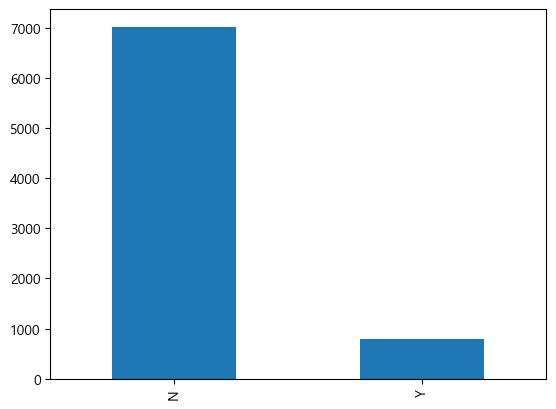

In [5]:
# termination 레이블 불균형 
df['termination'].value_counts().plot(kind='bar')

In [6]:
# ④ 데이터 전처리
# Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating'] # 문자 범주형 데이터를 숫자로 바꿔주기
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True) # 원핫인코딩

In [7]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   uint8  
 7   class_E              7814 non-null   uint8  
 8   class_F              7814 non-null   uint8  
 9   class_G              7814 non-null   uint8  
 10  class_H              7814 non-null   uint8  
 11  sex_M                7814 non-null   uint8  
 12  stop_Y               7814 non-null   uint8  
 13  npay_Y               7814 non-null   uint8  
 14  termination_Y        7814 non-null   uint8  
 15  bill_rating_low      7814 non-null   u

In [8]:
# ⑤ Train, Test 데이터셋 분할
from sklearn.model_selection import train_test_split

X = df1.drop('termination_Y', axis=1).values # 해지여부 제외한 나머지를 X로
y = df1['termination_Y'].values # 해지여부를 Y로

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [9]:
X_train.shape

(5469, 18)

In [10]:
y_train.shape

(5469,)

In [11]:
# ⑥ 데이터 정규화/스케일링(Normalizing/Scaling) 값 간의 차이를 스케일링
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
7809,76,1,1860.0000,1716.000000,0.0000,75,0,0,0,0,0,1,0,0,0,1,0,0,0
7810,15,1,1296.0999,194.414985,643.1001,15,0,0,0,0,0,0,0,1,0,1,0,0,0
7811,12,1,13799.6666,2069.949990,10605.9266,10,0,0,0,1,0,1,0,0,0,0,0,0,1
7812,40,0,3140.0000,942.000000,1884.0000,40,0,0,0,0,0,0,0,0,1,1,0,0,0
7813,59,1,2436.9000,365.535000,1839.9000,55,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[:2]

array([[0.38      , 0.33333333, 0.4295439 , 0.06384702, 0.41944434,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.58      , 0.11111111, 0.20111297, 0.38498933, 0.        ,
        0.6       , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ]])

In [ ]:
모델 입력갯수, 출력갯수 확인

In [14]:
X_train.shape

(5469, 18)

In [15]:
y_train.shape

(5469,)

In [ ]:
⑦ 모델 개발

In [ ]:
1) DNN
A. 이진 분류용 DNN layer - True냐 False냐 
18개 input layer - x에 대한 것들
unit 4개 hidden layer
unit 3개 hidden layer
1개 output layser : 이진분류 - y 결과
[출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

In [ ]:
# 지금은 개별 환경이라서 설치함 aidu에서는 바로 가능할듯
!pip install tensorflow 

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout #Activation은 몰라도 됨

In [40]:
# 18개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
모델 확인

In [42]:
model.summary() # 나가는 모양 볼 수 있음

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 76        
                                                                 
 dense_13 (Dense)            (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
모델 컴파일 – 이진 분류 모델

In [19]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])  
# 빨리 동작하기 위해 컴파일함 여러번 알아서 하는데, 옵티로 아담, 로스는 이진 분류(y값이 하나라서) 평가지표는 정확도로

In [ ]:
Dropout : 과적합 방지 일부러 연결 끊어서 과적합 방지
[출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [51]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3)) # 30퍼센트 확률로 위 4개 노드 중 연결을 끊겠다
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 76        
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
 dropout_9 (Dropout)         (None, 3)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
모델 컴파일 – 이진 분류 모델

In [53]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [ ]:
모델 훈련(학습) 하기

In [54]:
history = model.fit(X_train, y_train,  #컴파일한 모델 학습시키기 
          validation_data=(X_test, y_test), #모의고사 loss가 점점 떨어짐 accuracy가 점점 올라감 val loss랑 acc도 달라짐
          epochs=20, 
          batch_size=16) 

Epoch 1/20
342/342 [==============================] - 1s 1ms/step - loss: 0.5038 - accuracy: 0.8698 - val_loss: 0.3453 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8993 - val_loss: 0.3155 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8996 - val_loss: 0.3044 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8996 - val_loss: 0.2932 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8996 - val_loss: 0.2885 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8996 - val_loss: 0.2844 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8996 - val_loss: 0.2779 - val_accuracy: 0.8994
Epoch 

In [41]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.519114,0.857195,0.329876,0.89936
1,0.365358,0.899799,0.295942,0.89936
2,0.332165,0.899616,0.283755,0.89936
3,0.318002,0.899616,0.277336,0.89936
4,0.304012,0.899616,0.267807,0.89936


In [ ]:
B. 다중 분류용 DNN layer
18개 input layer
unit 5개 hidden layer
dropout
unit 4개 hidden layer
dropout
2개 output layser : 이진분류
    [출처] https://www.educba.com/dnn-neural-network/]

In [32]:
# 18개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layer : 다중분류  output 2개 이상이면 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3)) #0.3~0.5중에 넣으면 됨
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax')) # 2개 이상이면 softmax 사용해서 첫번째 y에 대한 확률, 두번째 y에 대한 확률

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 95        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
모델 컴파일 – 다중 분류 모델

In [34]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # y값이 원핫인코딩 안 돼서 sparse 넣어줌
              metrics=['accuracy'])  

In [ ]:
모델 훈련(학습) 하기

In [35]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16) 

Epoch 1/20
342/342 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.8572 - val_loss: 0.3299 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8998 - val_loss: 0.2959 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8996 - val_loss: 0.2838 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8996 - val_loss: 0.2773 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8996 - val_loss: 0.2678 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8993 - val_loss: 0.2583 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.9011 - val_loss: 0.2437 - val_accuracy: 0.8994
Epoch 

In [ ]:
⑧ 모델 성능 평가
성능 시각화

In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.519114,0.857195,0.329876,0.89936
1,0.365358,0.899799,0.295942,0.89936
2,0.332165,0.899616,0.283755,0.89936
3,0.318002,0.899616,0.277336,0.89936
4,0.304012,0.899616,0.267807,0.89936


<Axes: >

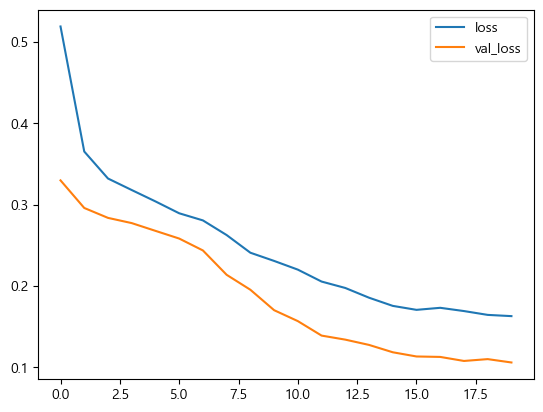

In [38]:
losses[['loss','val_loss']].plot()

<Axes: >

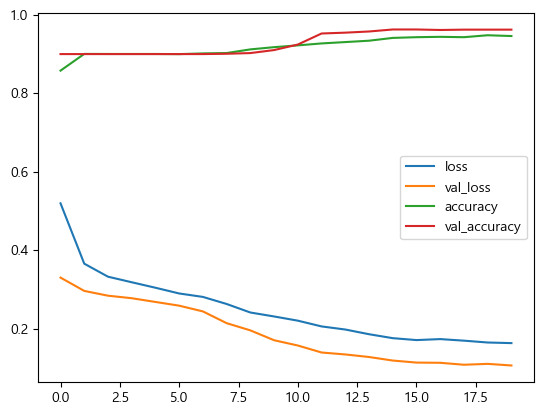

In [39]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

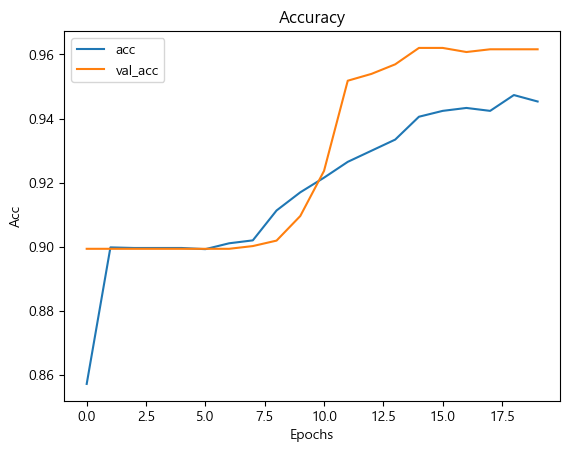

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

In [ ]:
배운 내용 정리
딥러닝 모델 프로세스 ① 라이브러리 임포트(import)
② 데이터 가져오기(Loading the data)
③ 탐색적 데이터 분석(Exploratory Data Analysis) 필요하면 EDA
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering) 등
⑤ Train, Test 데이터셋 분할
⑥ 데이터 정규화(Normalizing the Data)
⑦ 모델 개발(Creating the Model)
⑧ 모델 성능 평가
딥러닝 모델 DNN 구축 
테이블 형식 데이터 DNN